<a href="https://colab.research.google.com/github/cennetceylan19/ImageClassificationExamples/blob/main/UrbanSoundProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project for Classification of Urban Sounds

Hello everyone I have tried a new classification project. In this project, I have used the UrbanSound8K dataset. You can download it from the below link. The purpose of this project is to prepare an artificial intelligence model by using deep learning algorithms. I downloaded a dataset, made a spectogram out of sound files, and saved it to my computer in categories. Later, I created and trained a CNN model by preprocessing these images. Lets start.

In [ ]:
#download dataset as zip file.
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz

--2023-01-19 08:29:09--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  13.0MB/s    in 28m 44s 

2023-01-19 08:57:55 (3.33 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [ ]:
#exit to dataset from zip file.
!tar -xf UrbanSound8K.tar.gz

^C


# Import required dataset 

In [2]:
import os
import random
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import cv2 as cv
import tensorflow as tf

# Creating the spectrogram

In [ ]:
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv


def save_spectrogram(spectrogram, file_name, classid):
    if str(classid) not in os.listdir("spectrograms"):
        os.mkdir(f"spectrograms/{classid}")

    save_name = file_name.split(".")[0]
    
    plt.figure()
    librosa.display.specshow(spectrogram)
    plt.savefig(f"spectrograms/{classid}/{save_name}.png", bbox_inches="tight", pad_inches=0)
    plt.close()

**Librosa** is a Python package for music and audio analysis. 

**Why is a spectrogram performed?** 


Spectrogram is an images that  a signal in certain wave form in various frequencies representative signal power or heigh. At the same time, It shows also how change energy levels in the time.
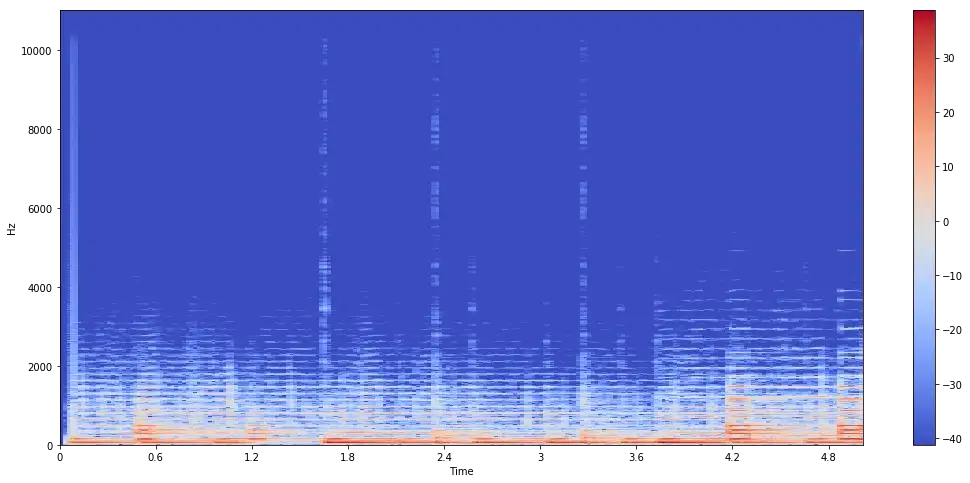

I used the spectrograms in order to process sounds and extract features from them.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


After I turn sounds into spectrograms, Sizes of spectrograms are resized 128 by 128 and turned into gray image.

In [5]:
images = []
number_of_errors = 0
number_of_processed = 0

for classid in os.listdir("/content/drive/MyDrive/spectrograms"):
    path_to_class = f"/content/drive/MyDrive/spectrograms/{classid}"
    for image in os.listdir(path_to_class):
        try:
            path_to_image = f"{path_to_class}/{image}"
            
            img = cv.imread(path_to_image, 0)
            img = cv.resize(img, (128,128))
            img = img/255
            images.append([img, int(classid)])
            number_of_processed += 1

        except:
            number_of_errors += 1
        
        print(f"\rProcessed: {number_of_processed} | Erros: {number_of_errors}", end="")

Processed: 8734 | Erros: 0

In [6]:
len(images)

8734

In [8]:
for _ in range(10):
    random.shuffle(images)

In [9]:
X = []
y = []

for image, idx in images:
    X.append(image)
    y.append(idx)


In [10]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

I seperated from dataset 874 images as validation 6980 images as train and 880 images as test.

In [11]:
X_train = X[:6980]
y_train = y[:6980]

X_val = X[6980:7854]
y_val = y[6980:7854]

X_test = X[7854:]
y_test = y[7854:]

In [12]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

6980
6980
874
874
880
880


In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
X_train = X_train.reshape(-1, 128, 128, 1) 
X_val = X_val.reshape(-1, 128, 128, 1) 
X_test = X_test.reshape(-1, 128, 128, 1) 

In [15]:
if "pickles" not in os.listdir():
    os.mkdir("pickles")

with open("pickles/X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("pickles/y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("pickles/X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("pickles/y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("pickles/X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("pickles/y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)

I used Python pickle to store data. I have to import the pickle module first. Then use pickle.dump() function to store the object data to the file. pickle.dump() function takes 3 arguments. The first argument is the object that you want to store. The second argument is the file object you get by opening the desired file in write-binary (wb) mode. And the third argument is the key-value argument. This argument defines the protocol. I used as second argument.

In [16]:
# Model
model= tf.keras.Sequential()

# Feature Extraction
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", input_shape=(128, 128, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(tf.keras.layers.Flatten())

# Classification
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Output Layer
# There are 10 classes in dataset so Dense is 10 in output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [17]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
219/219 [==============================] - 11s 9ms/step - loss: 2.2173 - accuracy: 0.1619 - val_loss: 2.0279 - val_accuracy: 0.2712
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 2.0060 - accuracy: 0.2381 - val_loss: 1.7821 - val_accuracy: 0.3009
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 1.8450 - accuracy: 0.2928 - val_loss: 1.6615 - val_accuracy: 0.3513
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 1.7035 - accuracy: 0.3345 - val_loss: 1.4987 - val_accuracy: 0.4451
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 1.5583 - accuracy: 0.3997 - val_loss: 1.3228 - val_accuracy: 0.4954
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 1.4230 - accuracy: 0.4415 - val_loss: 1.2659 - val_accuracy: 0.5229
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 1.3117 - accuracy: 0.4712 - val_loss: 1.1735 - val_accuracy: 0.5103
Epoch

In [20]:
result = model.evaluate(X_test, y_test)
print(f"Loss: {result[0]} - Accuracy: {result[1]}")

28/28 [==============================] - 0s 7ms/step - loss: 0.7548 - accuracy: 0.8170
Loss: 0.7548366189002991 - Accuracy: 0.8170454502105713


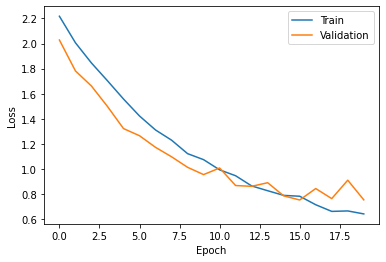

In [21]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

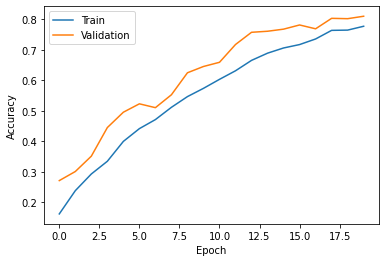

In [22]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()